In [38]:
# --Import Modules and Load Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
    print("--successfully loaded dataset")

except FileNotFoundError:
    print("--file not found, pleaee enter the correct filepath")

--successfully loaded dataset


In [39]:
# --Summary Statistics

numerical_df = df.select_dtypes( include = ['number'])

print(f"mean :\n{numerical_df.mean()}")
print()
print(f"median :\n{numerical_df.median()}")
print()
print(f"standard deviation :\n{numerical_df.std()}")

mean :
PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

median :
PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

standard deviation :
PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64


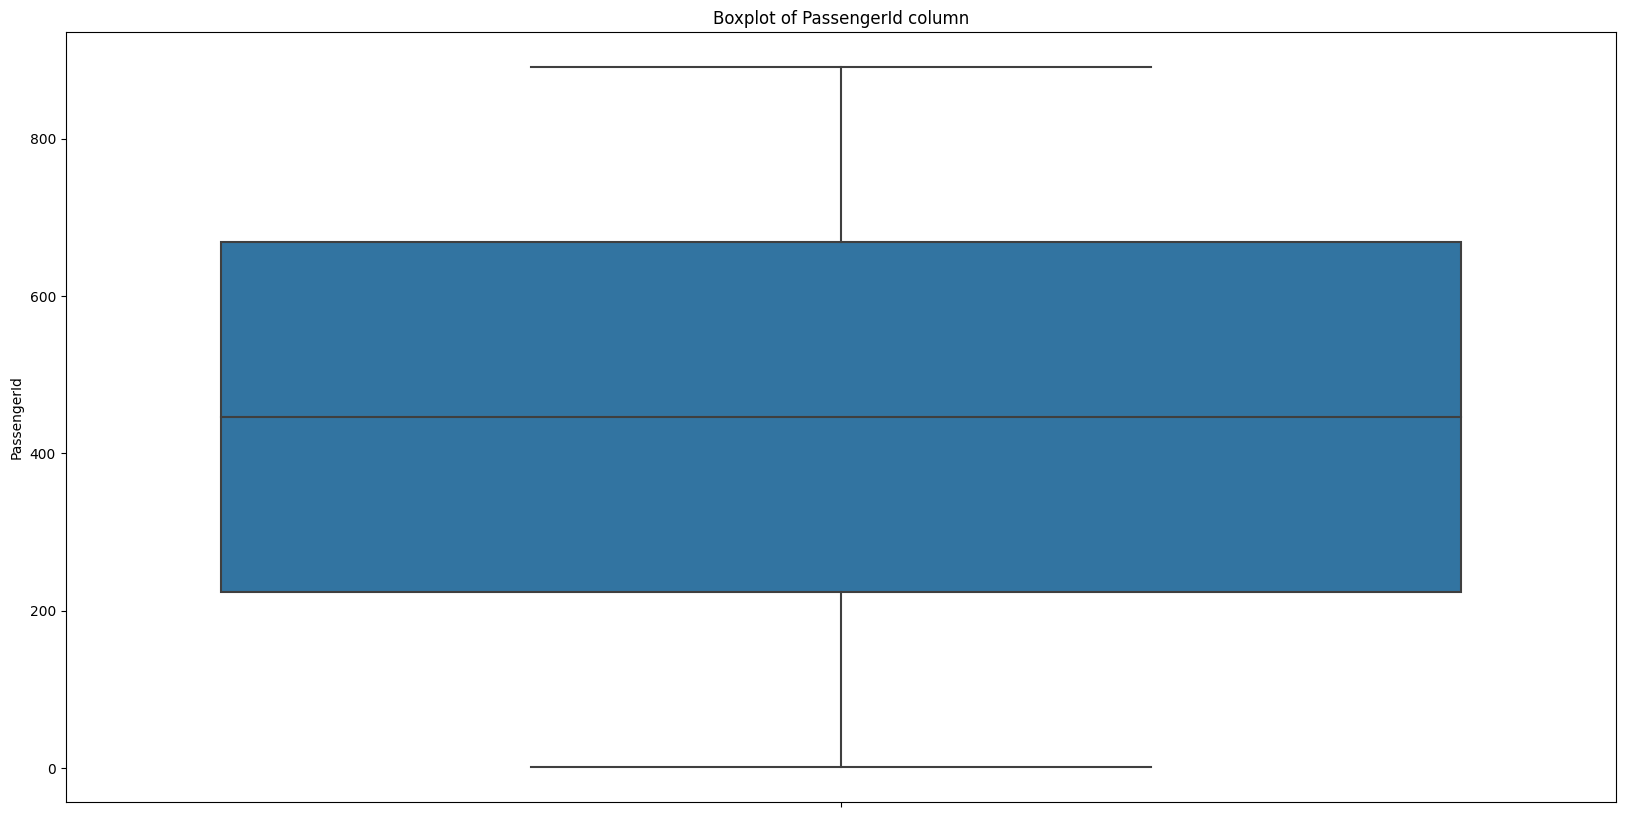

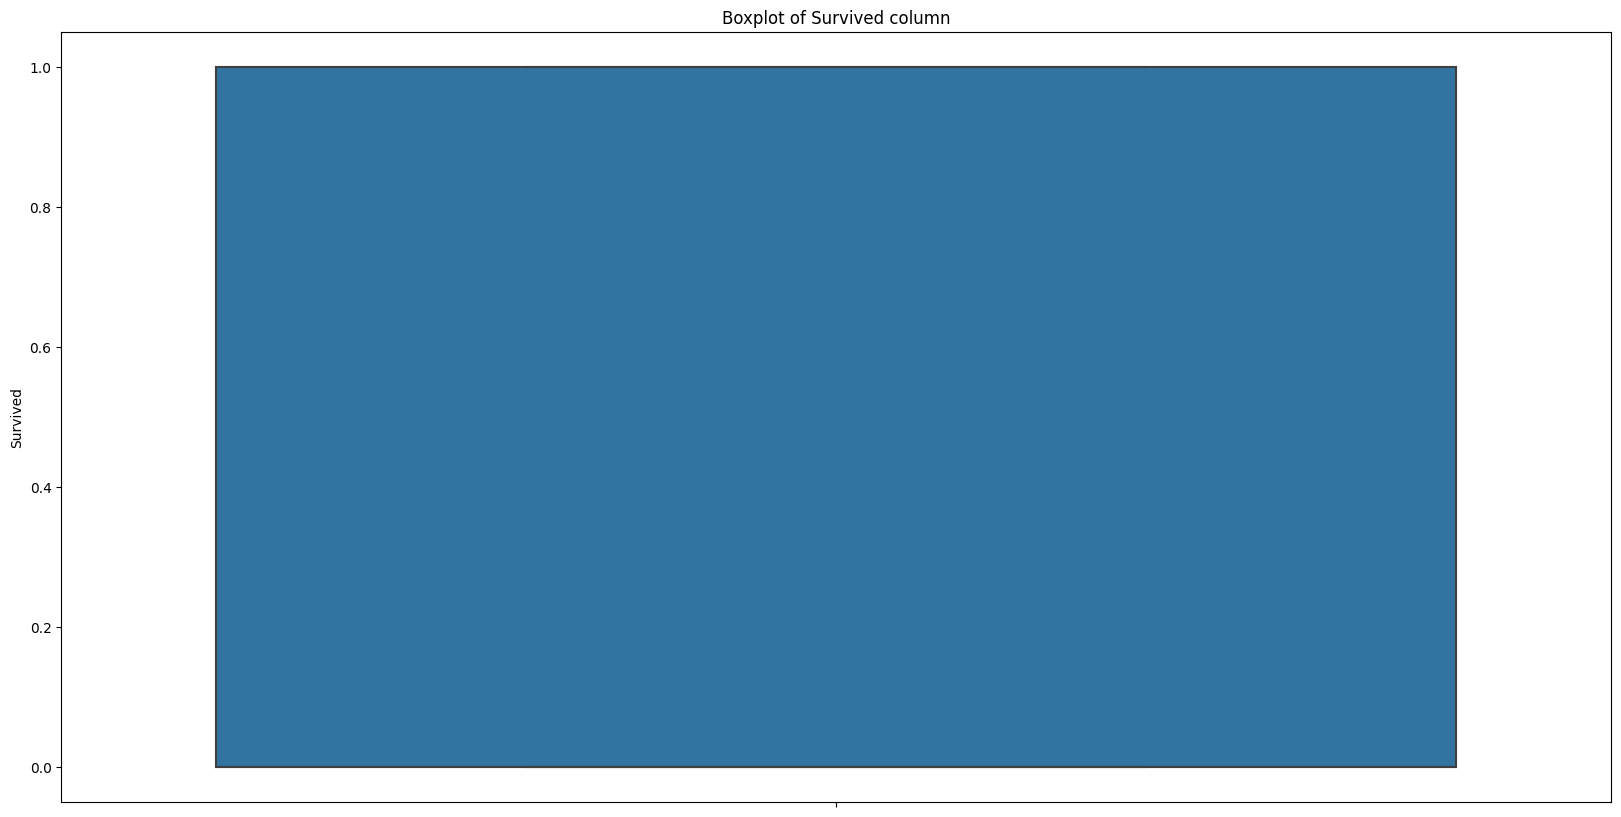

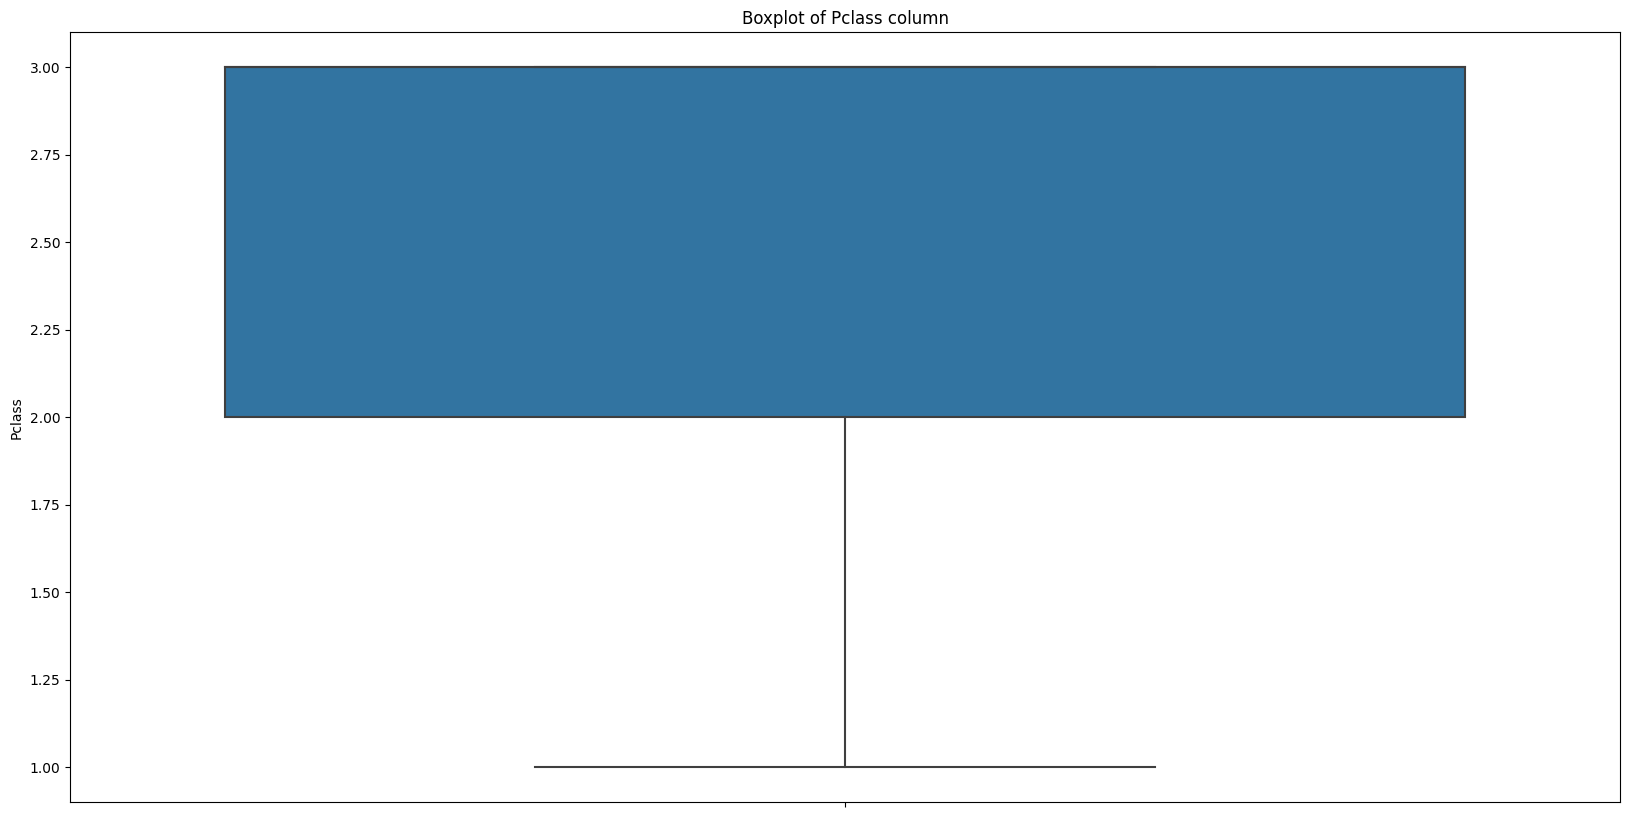

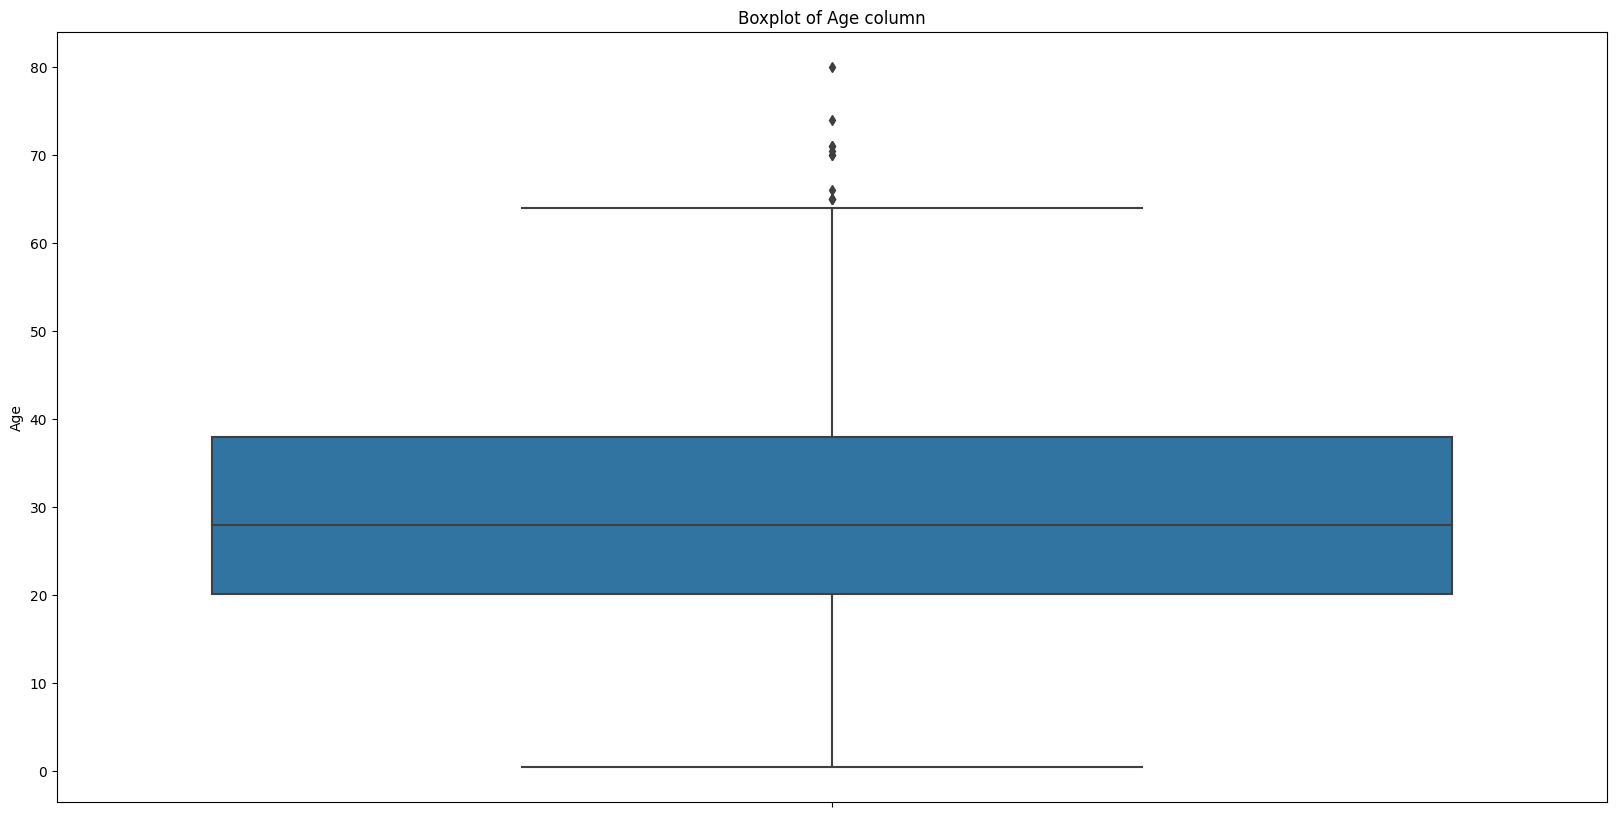

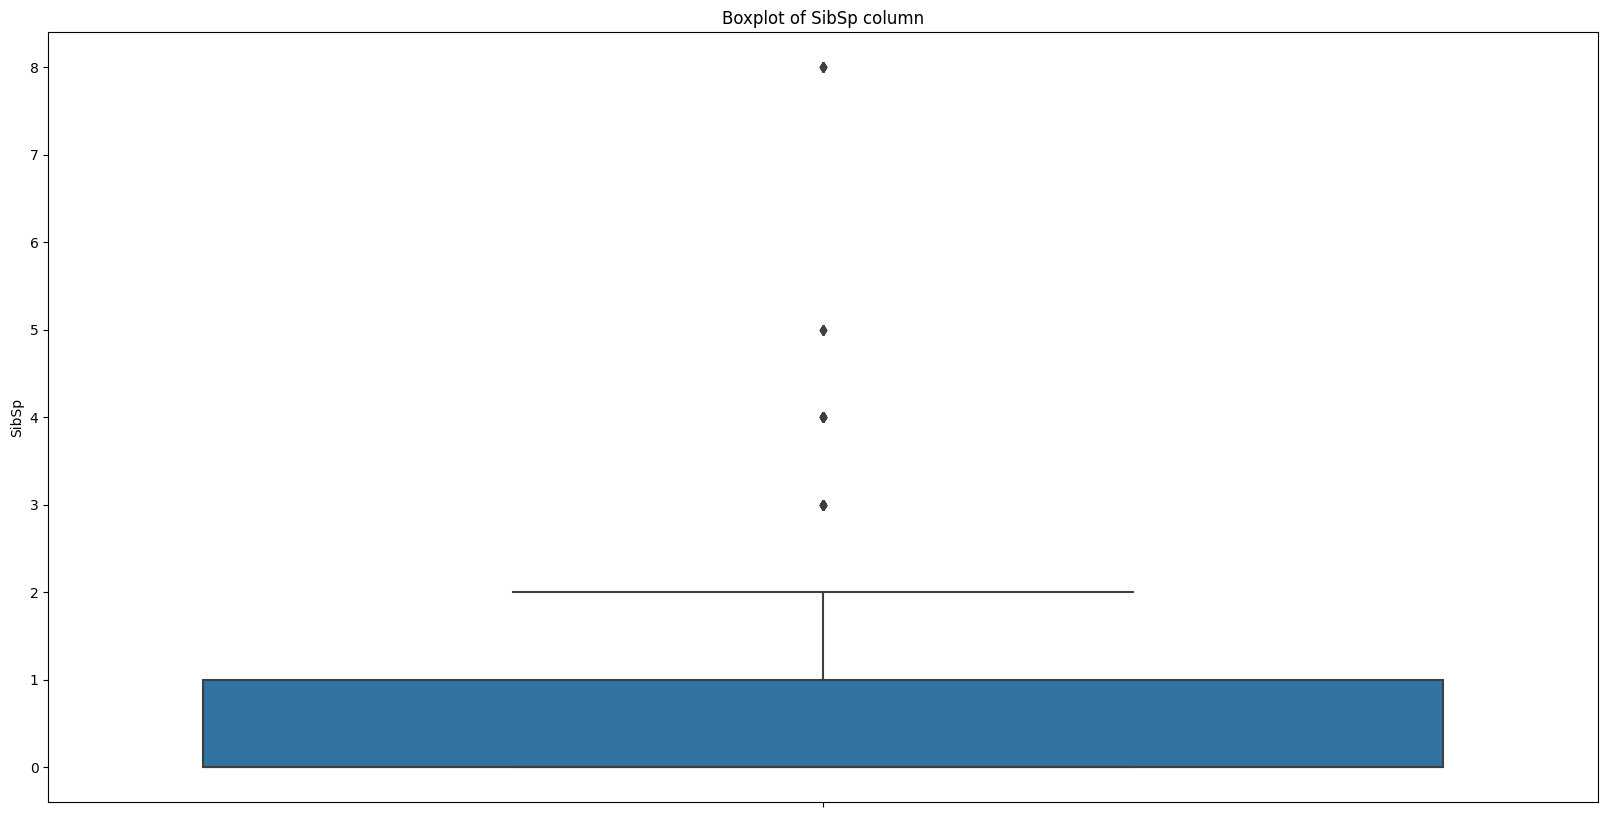

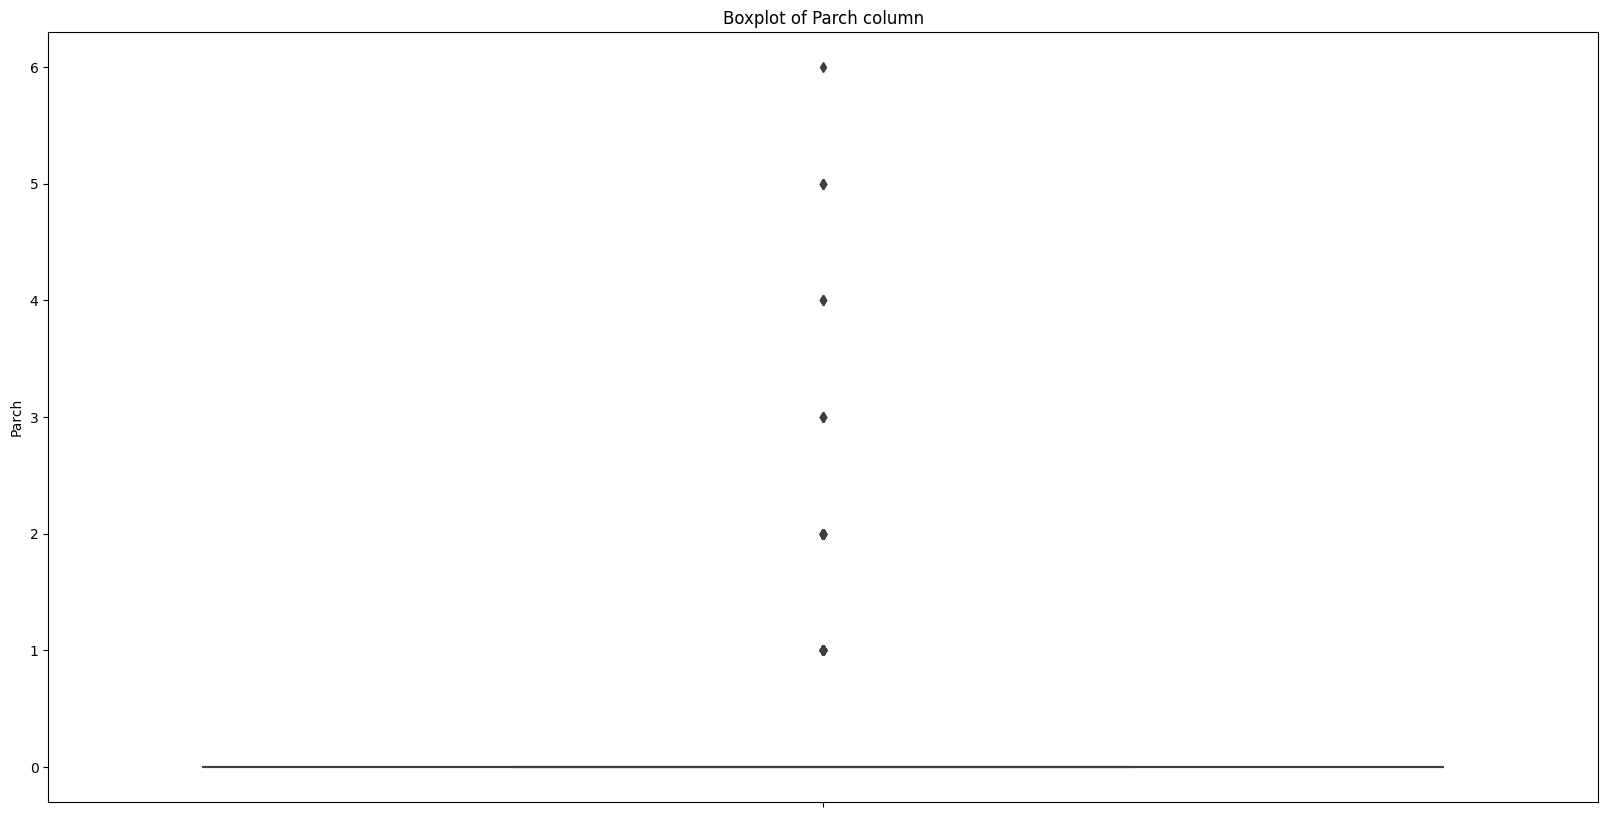

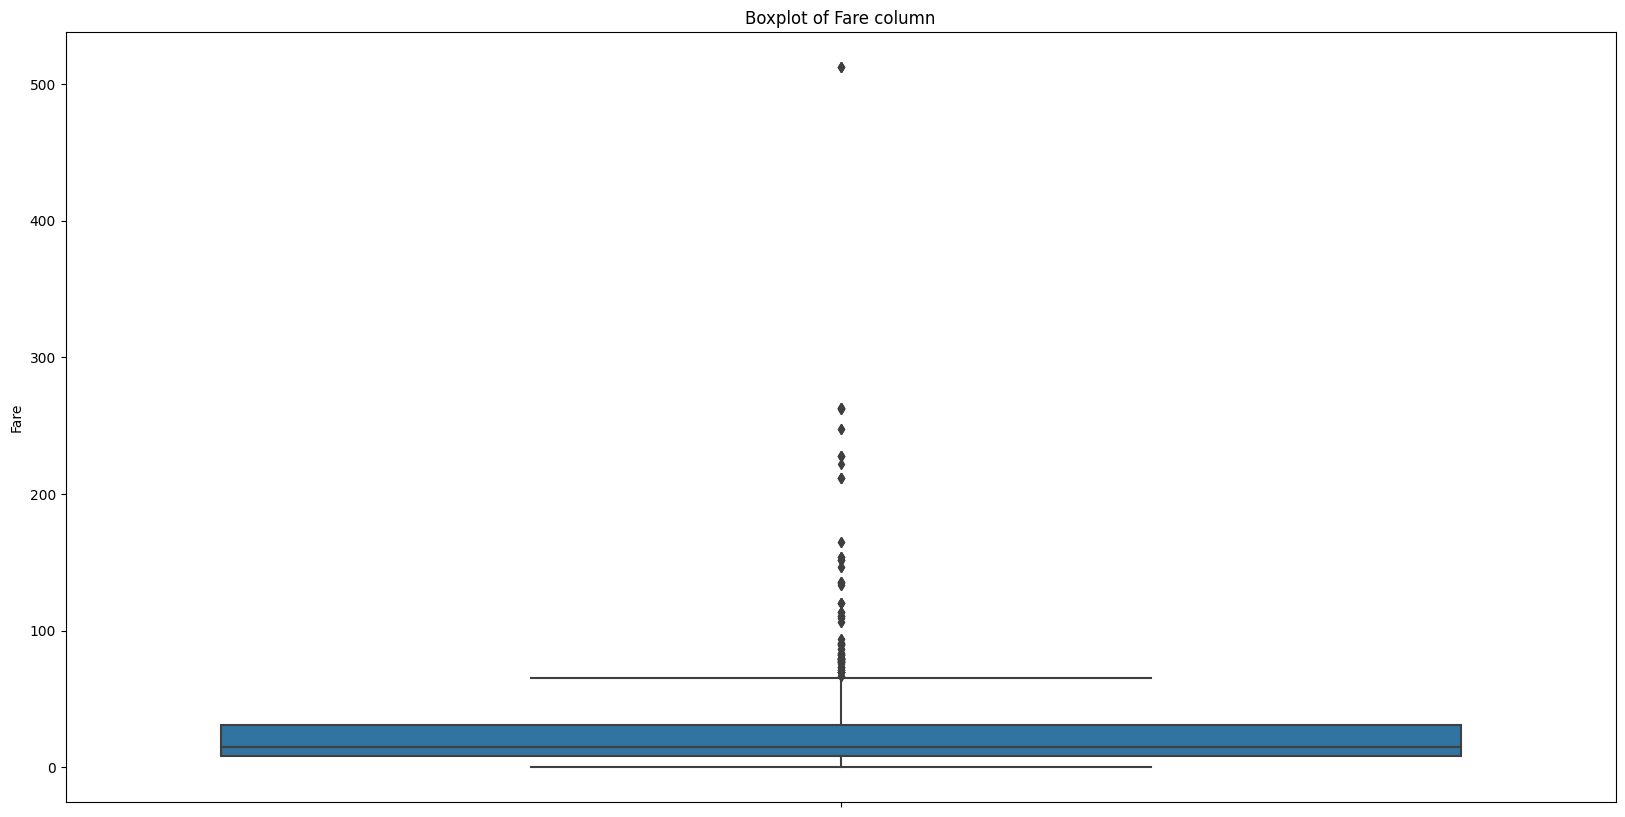

In [40]:
# --Numerical Features Boxplots

for col in numerical_df.columns:
    plt.figure(figsize = (20, 10))
    sns.boxplot(data = numerical_df, y = col)
    plt.title(f"Boxplot of {col} column")
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


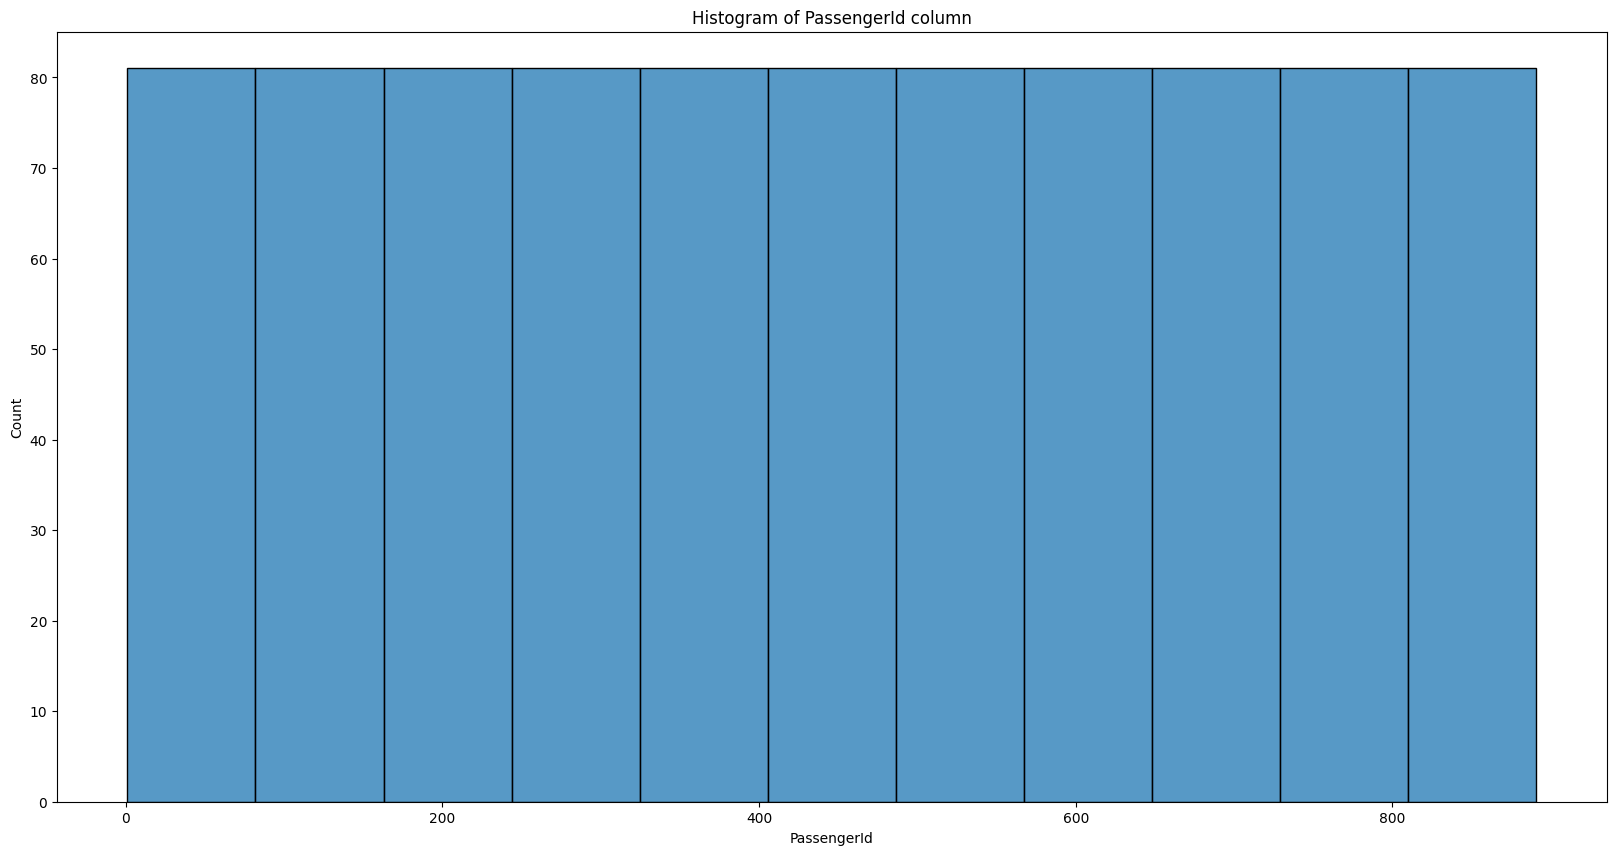

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


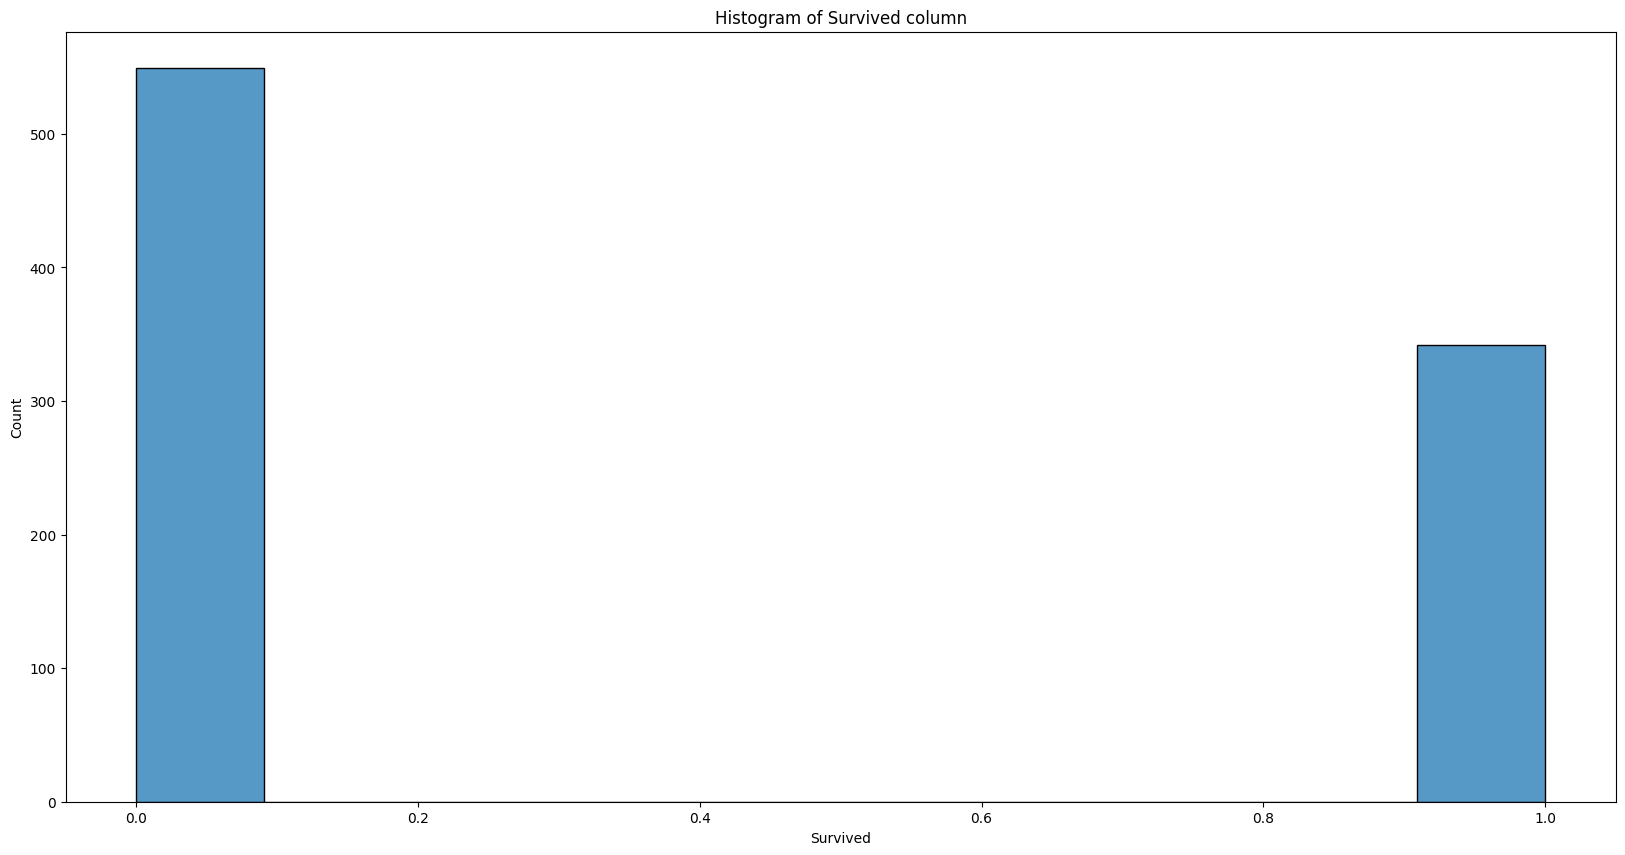

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


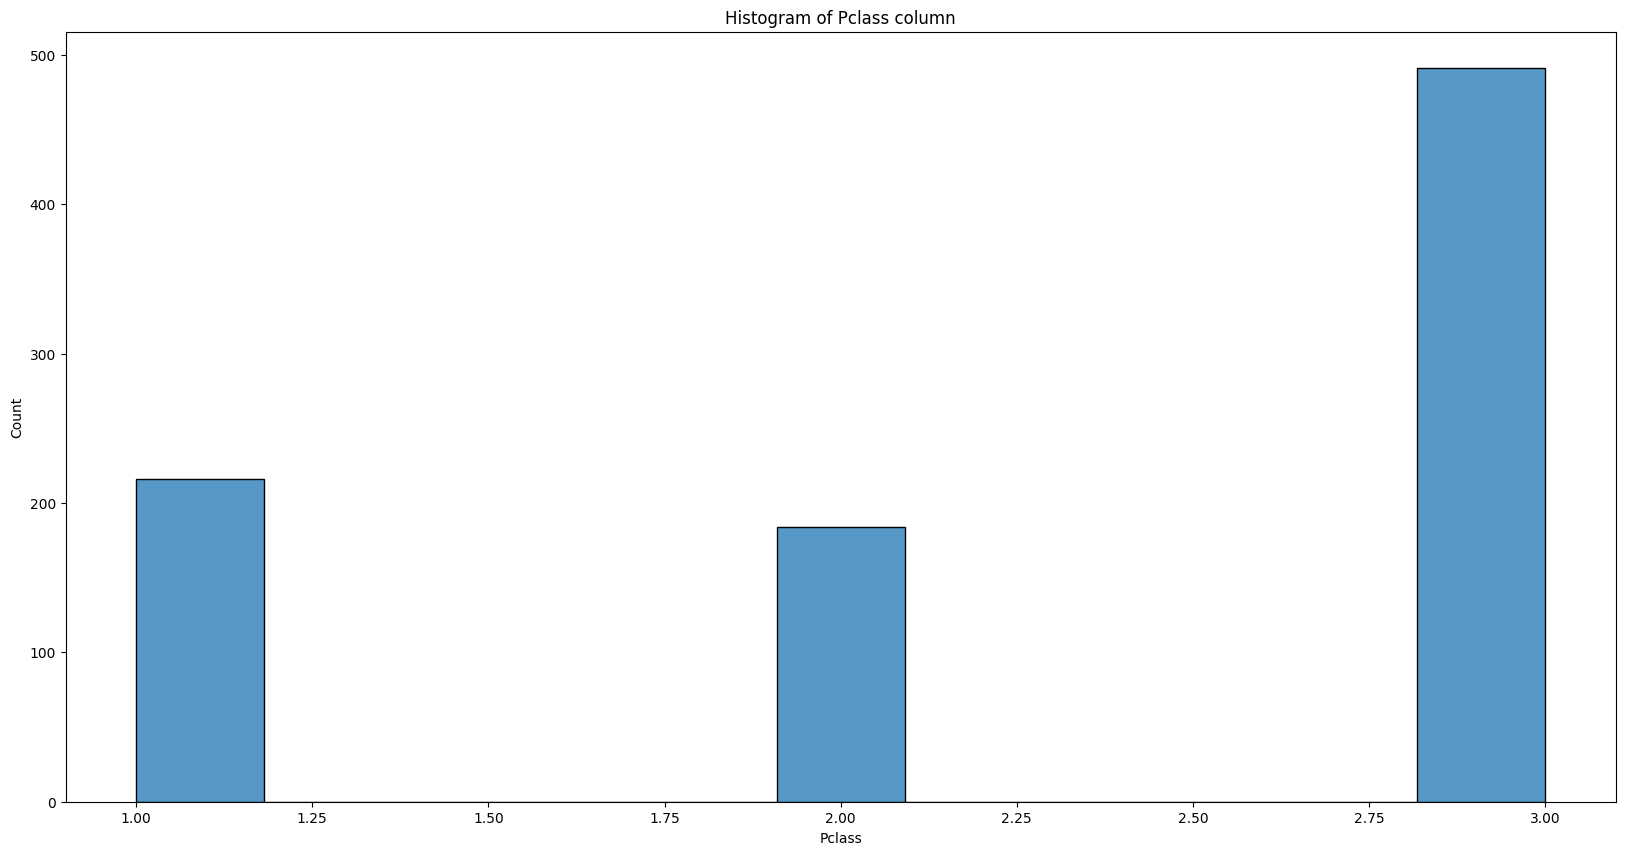

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


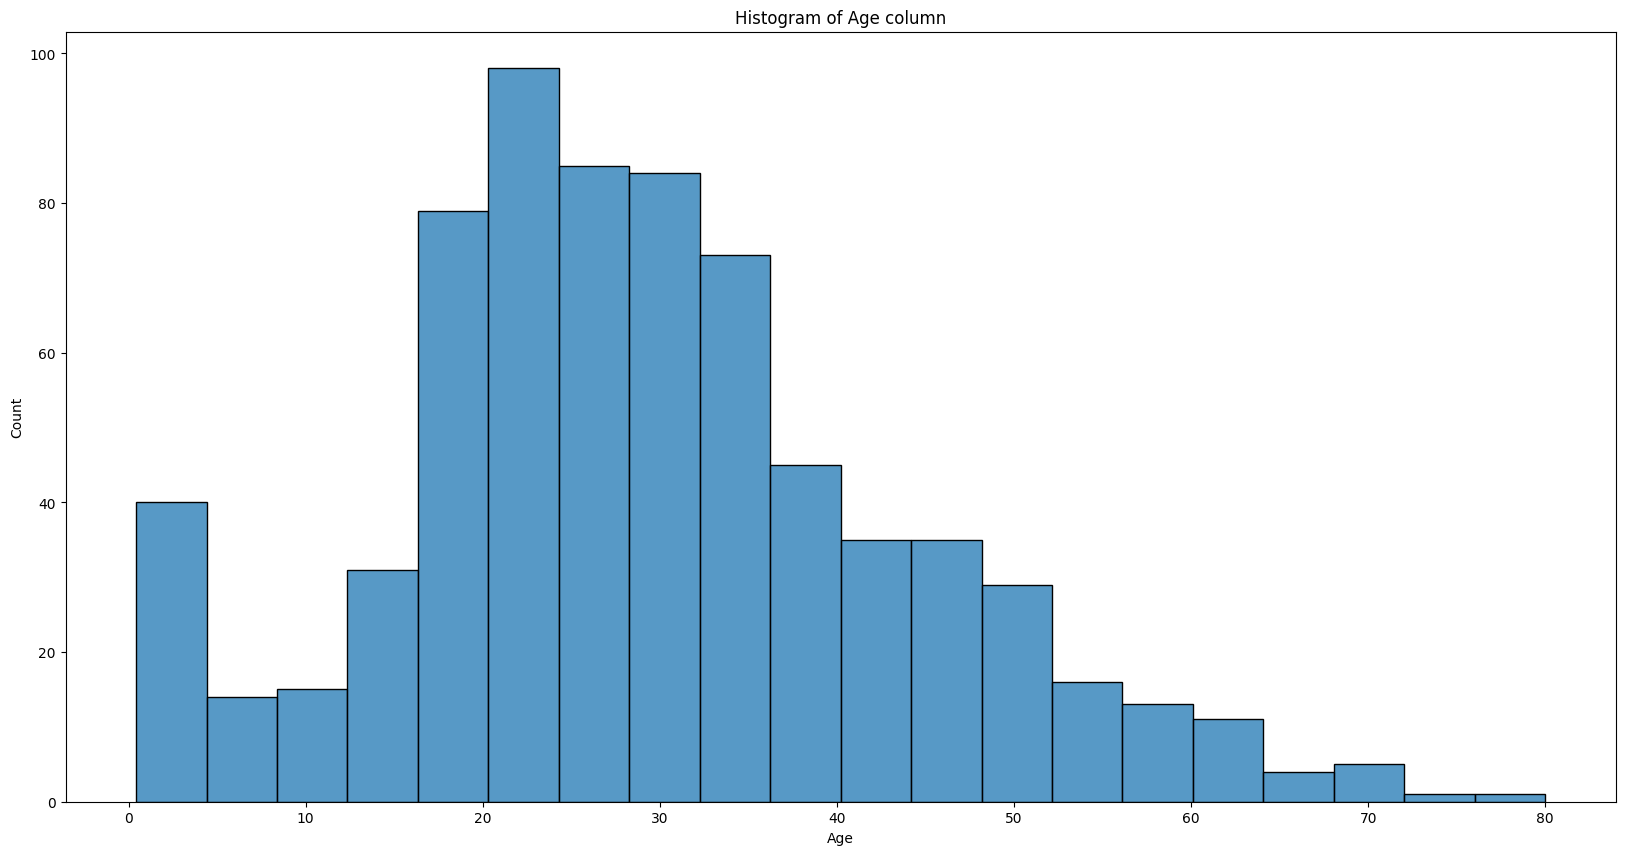

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


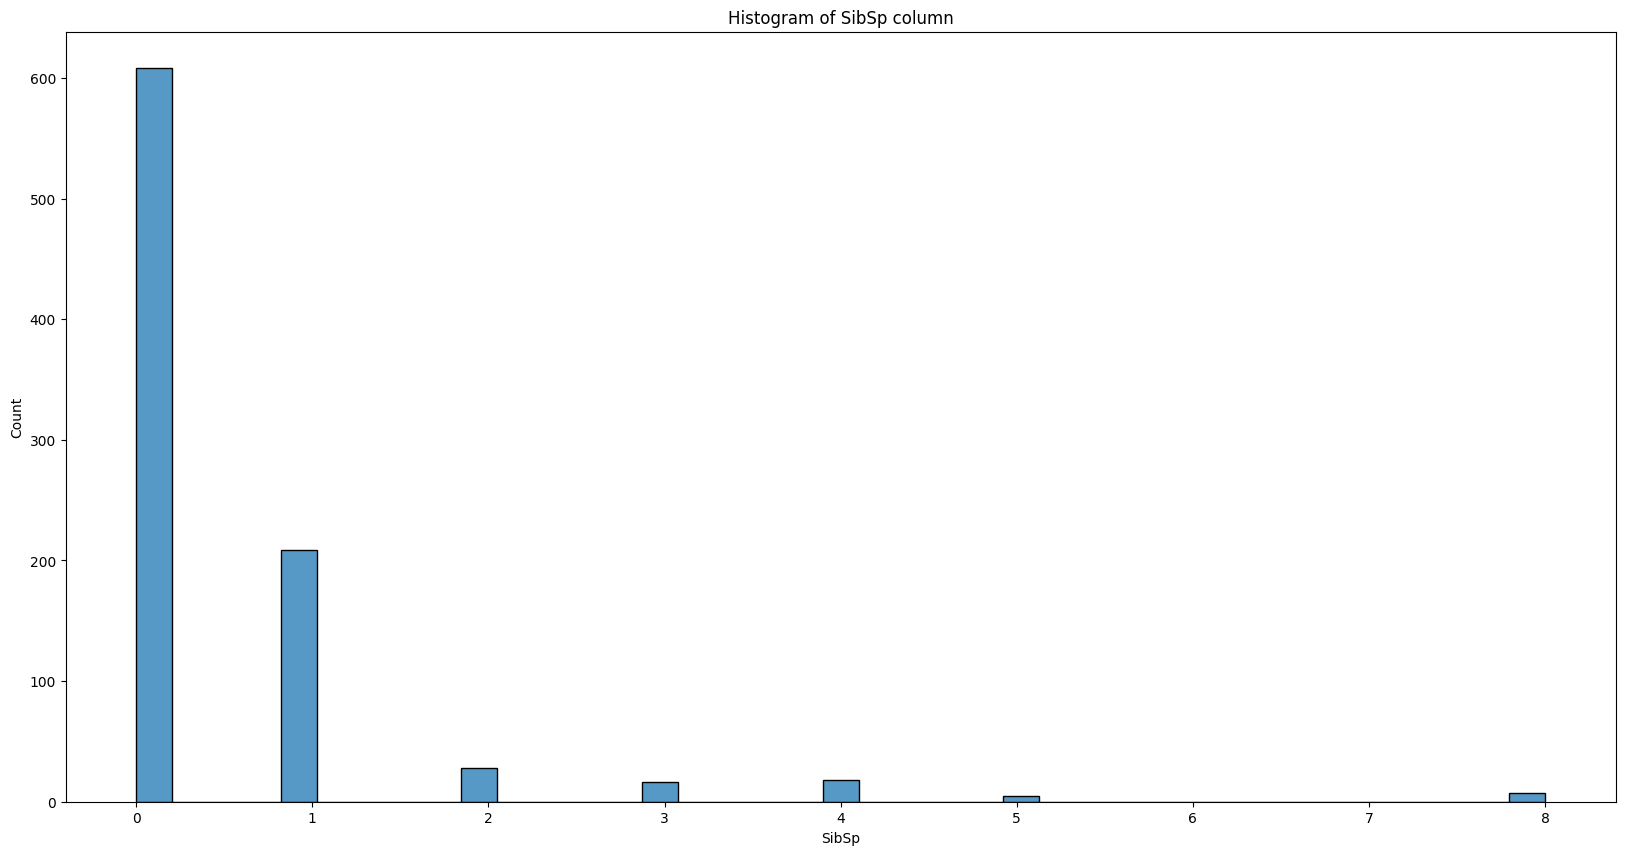

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


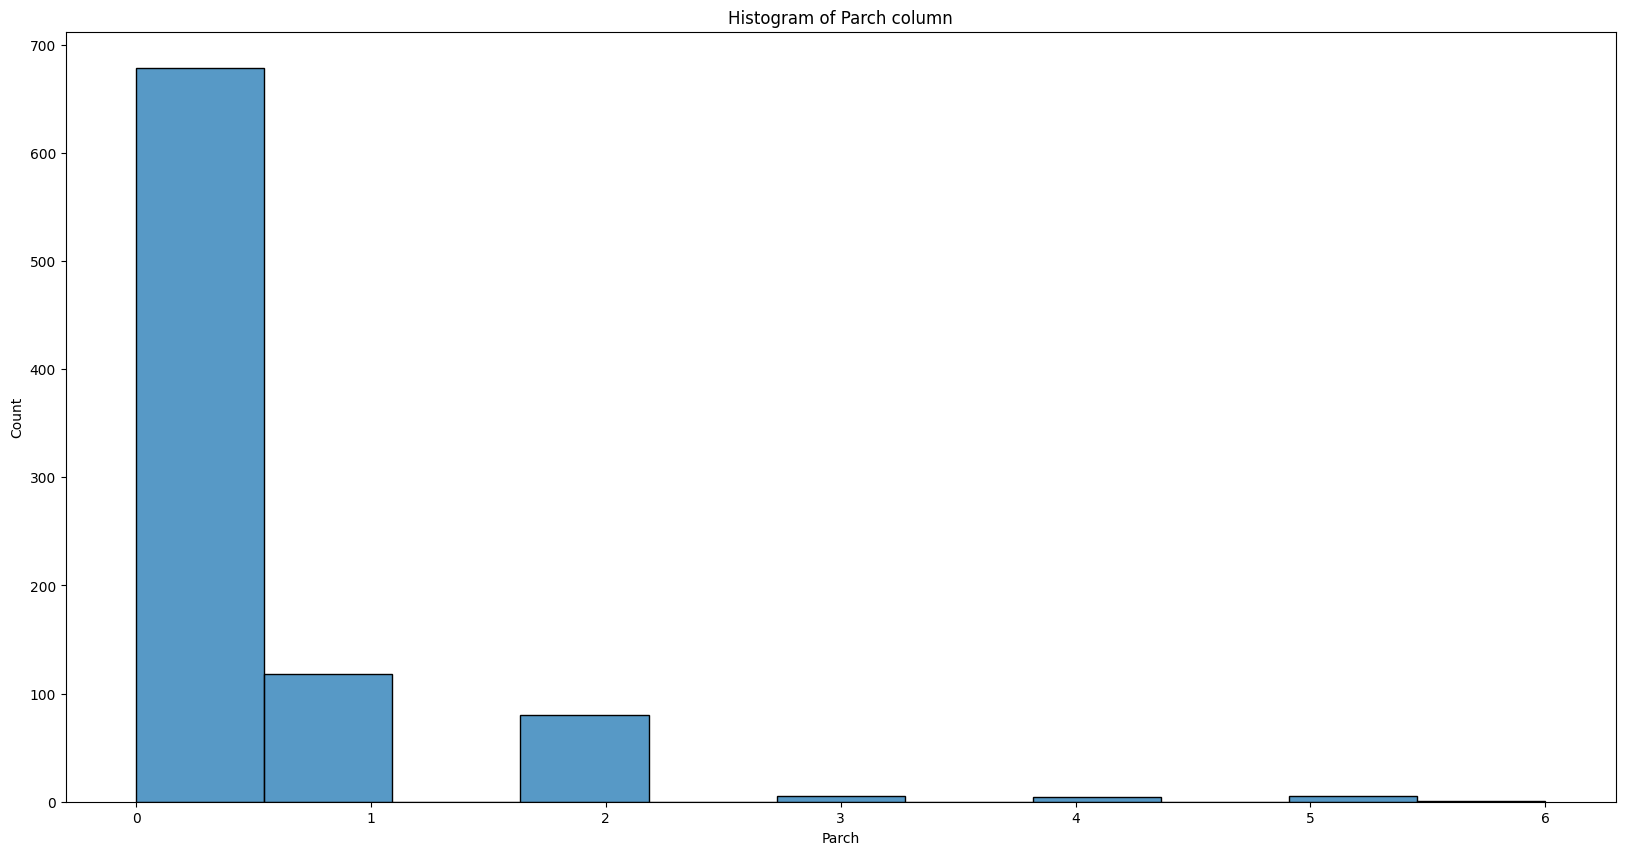

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


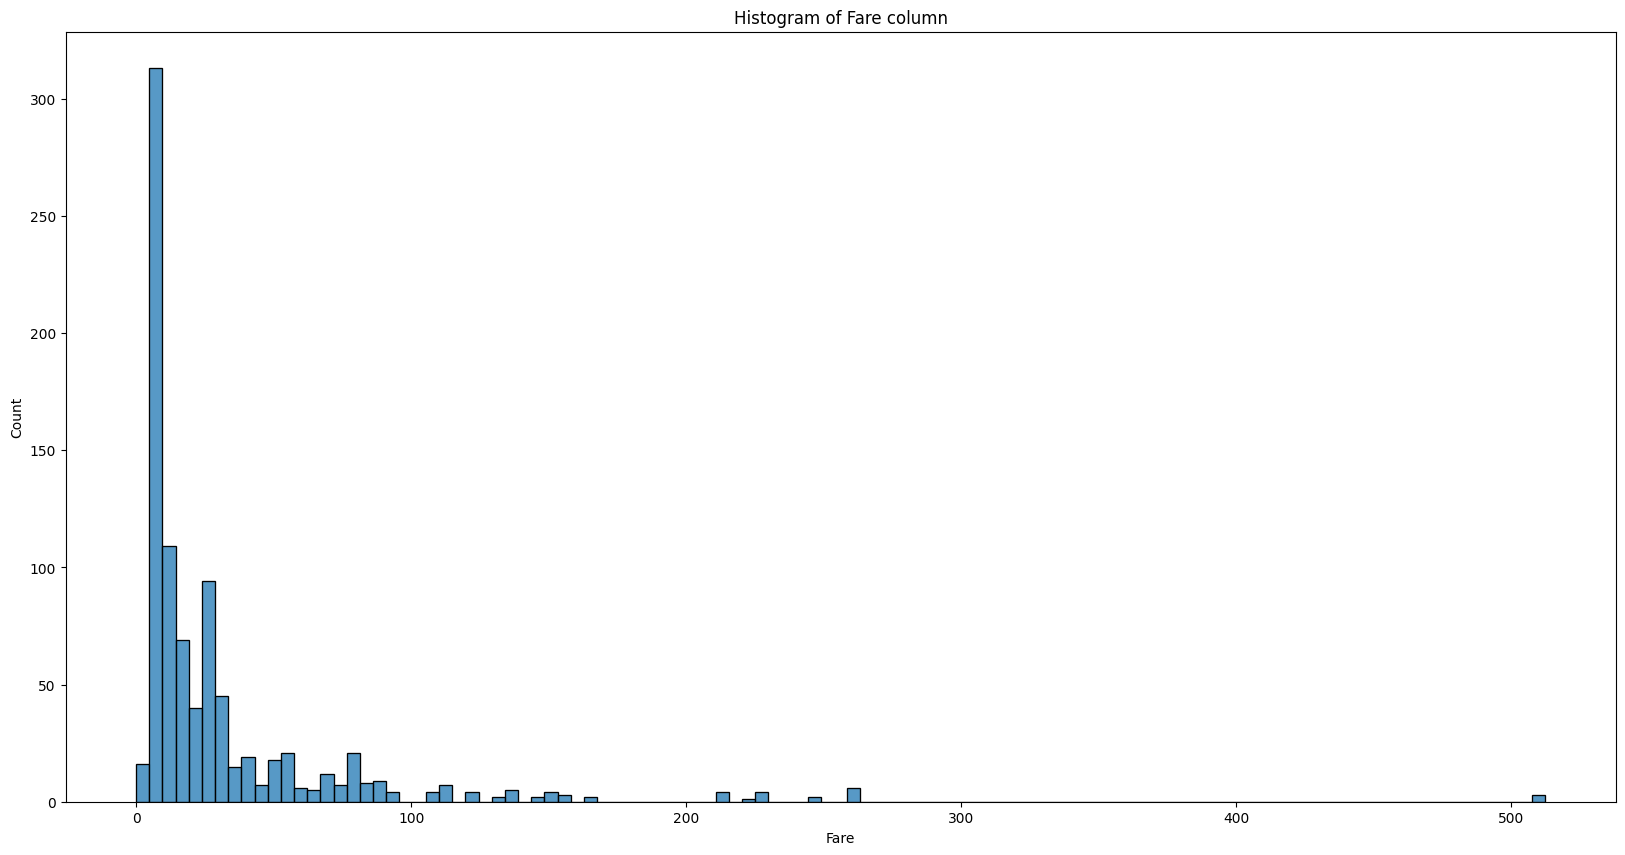

In [41]:
# --Numerical Features Histplots

for col in numerical_df.columns:
    plt.figure(figsize = (20, 10))
    sns.histplot(data = numerical_df, x = col)
    plt.title(f"Histogram of {col} column")
    plt.show()

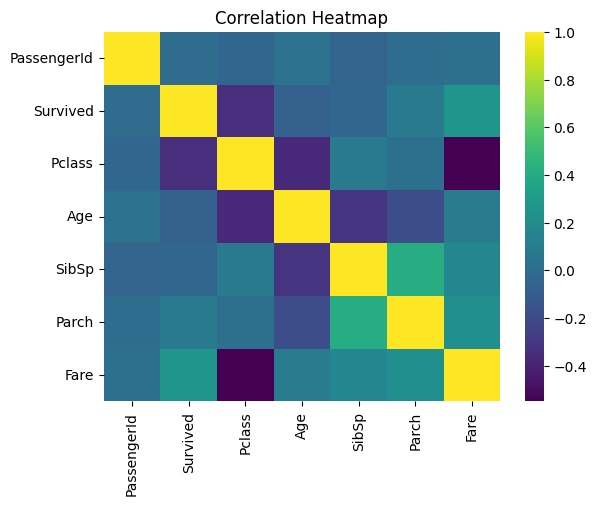

In [42]:
# --Correlation Heatmap

sns.heatmap(numerical_df.corr(), cmap = 'viridis')
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

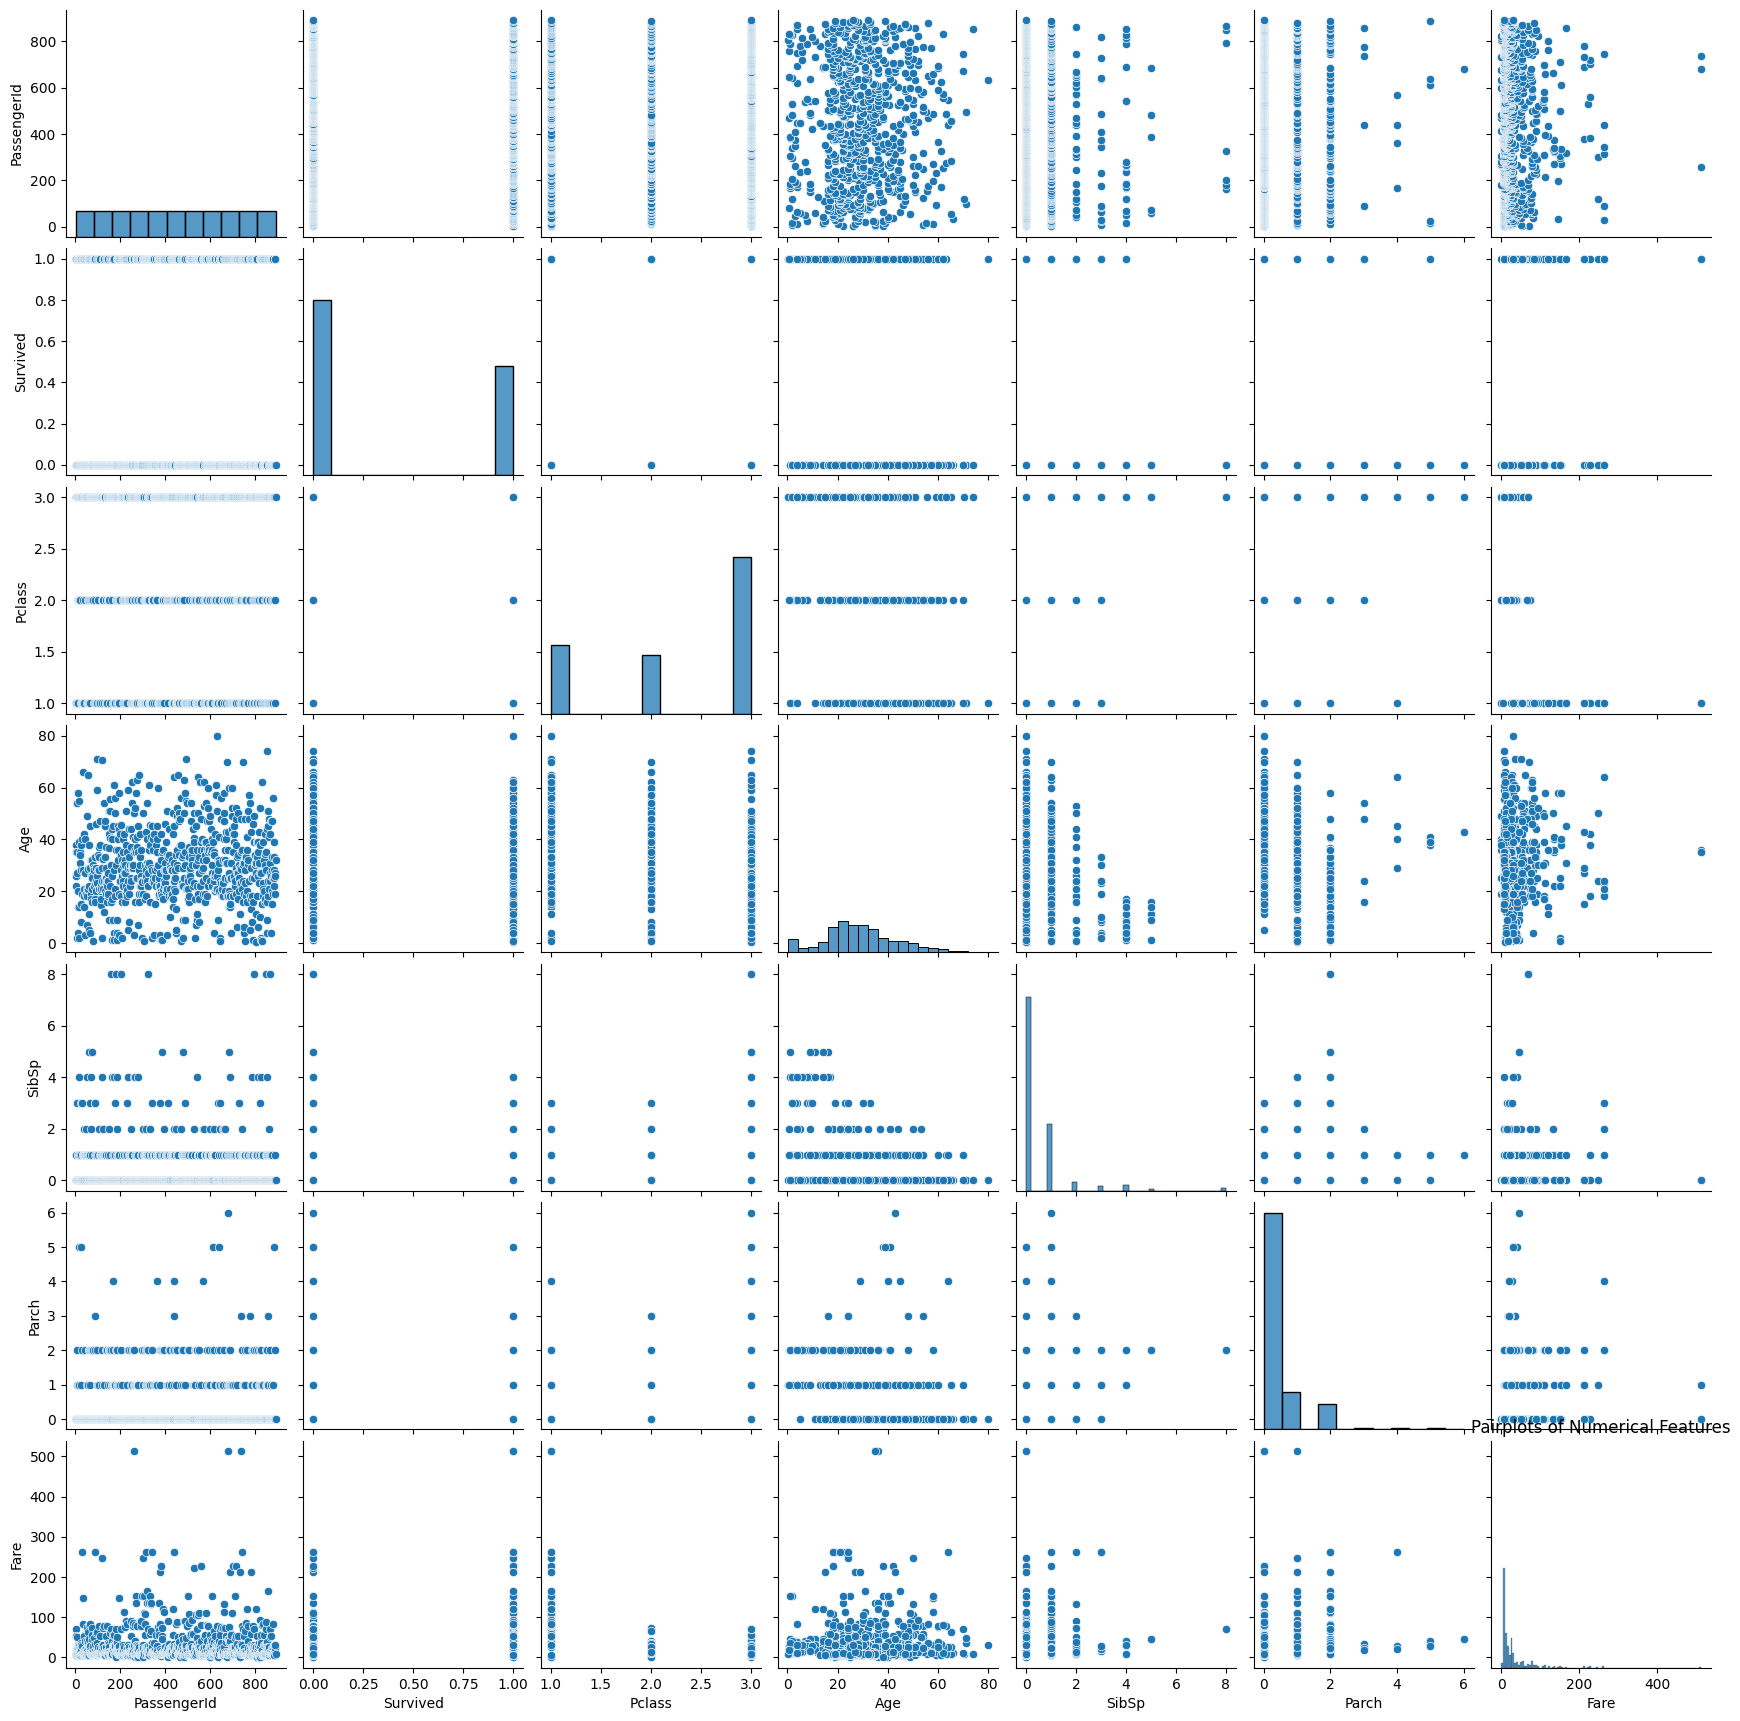

In [43]:
# --Pairplots of Numerical Features

sns.pairplot(numerical_df)
plt.title("Pairplots of Numerical Features")
plt.show()

In [44]:
# --- OBSERVATIONS ---
print("--- EDA OBSERVATIONS ---")

# Observation 1: Target Imbalance
survival_rate = numerical_df['Survived'].mean() * 100
print(f"1. Survival Imbalance: Only {survival_rate:.2f}% survived.")
print("   Inference: Modeling metrics (F1-score, Recall) must be used over raw Accuracy.")

# Observation 2: Fare Skewness
mean_fare = numerical_df['Fare'].mean()
median_fare = numerical_df['Fare'].median()
print(f"2. Fare Skewness: Mean Fare (${mean_fare:.2f}) > Median Fare (${median_fare:.2f}).")
print("   Inference: Data is highly right-skewed; a log transformation will likely be needed.")

# Observation 3: Family Feature Correlation (from the heatmap)
sibsp_parch_corr = numerical_df.corr().loc['SibSp', 'Parch']
print(f"3. Family Correlation: SibSp/Parch are correlated ({sibsp_parch_corr:.2f}).")
print("   Inference: These features should be combined (Family_Size) to reduce multicollinearity.")

--- EDA OBSERVATIONS ---
1. Survival Imbalance: Only 38.38% survived.
   Inference: Modeling metrics (F1-score, Recall) must be used over raw Accuracy.
2. Fare Skewness: Mean Fare ($32.20) > Median Fare ($14.45).
   Inference: Data is highly right-skewed; a log transformation will likely be needed.
3. Family Correlation: SibSp/Parch are correlated (0.41).
   Inference: These features should be combined (Family_Size) to reduce multicollinearity.
